# K-nearest neighbour algorithm

Let's apply this algorithm on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The dataset is easily available through sklearn. The problem is that given a new flower from an unknown species, you want to assign it a species based on what other flowers it is most similar to.

First load the iris dataset.

In [91]:
from sklearn.datasets import load_iris
import pandas as pd

# load dataset and partition in training and testing sets
iris = load_iris()

x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Now, let's visualise the data. Most of the time this helps with understanding the problem better.

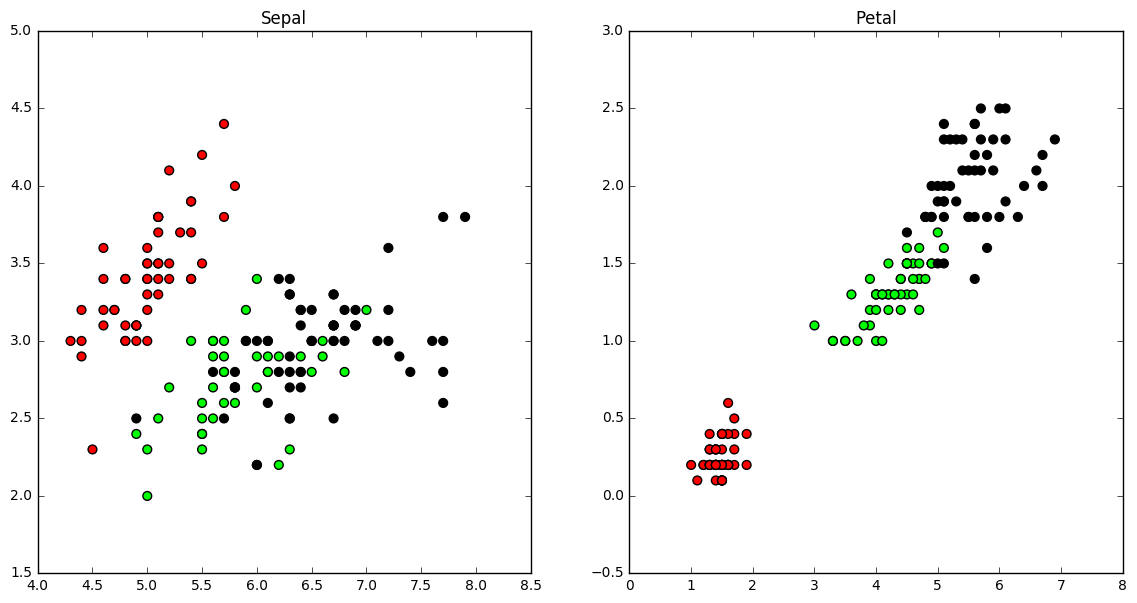

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

plt.show()

After the data is loaded, it needs to be split in training and test. For that purpose the `train_test_split(*arrays, **options)` function from sklearn is useful for creating random train and test subsets.

In [93]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x.values, y.values, \
                                                                     test_size=0.4, random_state=1)
 
# reformat train/test datasets for convenience
train = np.array(zip(X_train,y_train))
test = np.array(zip(X_test, y_test))

In order to solve the initial problem, it would be useful to measure the distance between classes - a measure of similarity. One such measure is the Euclidean distance, where the distance between two points `x` and `y` is given by ![](distance_euclidean_1.gif) where `n` is the number of dimensions (four in the case of the iris dataset). 

We’ll be making use of the zip function and list comprehensions. The zip function aggregates elements from lists (or other iterables, like strings) to return a list of tuples, such that `zip([1,2,3], [4,5,6])` will return `[(1,4), (2,5), (3,6)]`.

In [94]:
import math

def get_distance(data1, data2):
    points = zip(data1, data2)
    diffs_squared_distance = [pow(x - y, 2) for (x, y) in points]
    return math.sqrt(sum(diffs_squared_distance))

For example, the distance between the first two training points is:

In [95]:
get_distance(train[0][0], train[1][0])

4.052159917870962

Let's compute and sort the distances between a test case and all training cases.

In [96]:
from operator import itemgetter
 
def get_neighbours(training_set, test_instance, k):
    distances = [_get_tuple_distance(training_instance, test_instance) for training_instance in training_set]
 
    # index 1 is the calculated distance between training_instance and test_instance
    sorted_distances = sorted(distances, key=itemgetter(1))
 
    # extract only training instances
    sorted_training_instances = [tuple[0] for tuple in sorted_distances]
 
    # select first k elements
    return sorted_training_instances[:k]
 
def _get_tuple_distance(training_instance, test_instance):
    return (training_instance, get_distance(test_instance, training_instance[0]))

Using the nearest neighbours you just identified, you can get a prediction for the class of the test instance by majority voting – simply tally up which class comes up the most often among the nearest neighbours.

In [97]:
from collections import Counter

def get_majority_vote(neighbours):
    # index 1 is the class
    classes = [neighbour[1] for neighbour in neighbours]
    count = Counter([cl[0] for cl in classes])
    return count.most_common()[0][0] 

Finally, we create a classification report.

In [98]:
from sklearn.metrics import classification_report, accuracy_score

import numpy as np
# generate predictions
predictions = []

# let's arbitrarily set k equal to 5, meaning that to predict the class of new instances,
k = 5

# for each instance in the test set, get nearest neighbours and majority vote on predicted class
for x in range(len(X_test)):
    print x
    print 'Classifying test instance number ' + str(x) + ":",
    neighbours = get_neighbours(training_set=train, test_instance=test[x][0], k=5)
    majority_vote = get_majority_vote(neighbours)
    predictions.append(majority_vote)
    print 'Predicted label=' + str(majority_vote) + ', Actual label=' + str(test[x][1])

# summarize performance of the classification
print '\nThe overall accuracy of the model is: ' + str(accuracy_score(y_test, predictions)) + "\n"
report = classification_report(y_test, predictions, target_names = iris.target_names)
print 'A detailed classification report: \n\n' + report

0
Classifying test instance number 0: Predicted label=0, Actual label=[0]
1
Classifying test instance number 1: Predicted label=1, Actual label=[1]
2
Classifying test instance number 2: Predicted label=1, Actual label=[1]
3
Classifying test instance number 3: Predicted label=0, Actual label=[0]
4
Classifying test instance number 4: Predicted label=2, Actual label=[2]
5
Classifying test instance number 5: Predicted label=1, Actual label=[1]
6
Classifying test instance number 6: Predicted label=2, Actual label=[2]
7
Classifying test instance number 7: Predicted label=0, Actual label=[0]
8
Classifying test instance number 8: Predicted label=0, Actual label=[0]
9
Classifying test instance number 9: Predicted label=2, Actual label=[2]
10
Classifying test instance number 10: Predicted label=1, Actual label=[1]
11
Classifying test instance number 11: Predicted label=0, Actual label=[0]
12
Classifying test instance number 12: Predicted label=2, Actual label=[2]
13
Classifying test instance num